# Import thư viện

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tổng quan tập dữ liệu

In [45]:
df = pd.read_csv("../../data/root_data/paris_weekends.csv", sep=',')
print("Kích thước dữ liệu:", df.shape)

Kích thước dữ liệu: (3558, 20)


In [46]:
# Thông tin cơ bản
print("===== Thông tin cơ bản =====")
print(df.info())
print("\n===== 5 dòng đầu tiên =====")
print(df.head())


===== Thông tin cơ bản =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3558 entries, 0 to 3557
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  3558 non-null   int64  
 1   realSum                     3558 non-null   float64
 2   room_type                   3558 non-null   object 
 3   room_shared                 3558 non-null   bool   
 4   room_private                3558 non-null   bool   
 5   person_capacity             3558 non-null   float64
 6   host_is_superhost           3558 non-null   bool   
 7   multi                       3558 non-null   int64  
 8   biz                         3558 non-null   int64  
 9   cleanliness_rating          3558 non-null   float64
 10  guest_satisfaction_overall  3558 non-null   float64
 11  bedrooms                    3558 non-null   int64  
 12  dist                        3558 non-null   float64
 13  metr

In [47]:
# Thống kê numeric
print("\n===== Thống kê numeric =====")
print(df.describe())


===== Thống kê numeric =====
        Unnamed: 0      realSum  person_capacity        multi          biz  \
count  3558.000000  3558.000000      3558.000000  3558.000000  3558.000000   
mean   1778.500000   387.028589         2.959247     0.214727     0.234963   
std    1027.250456   260.075100         1.205727     0.410691     0.424036   
min       0.000000    95.302451         2.000000     0.000000     0.000000   
25%     889.250000   240.994035         2.000000     0.000000     0.000000   
50%    1778.500000   316.199087         2.000000     0.000000     0.000000   
75%    2667.750000   461.133377         4.000000     0.000000     0.000000   
max    3557.000000  4188.414577         6.000000     1.000000     1.000000   

       cleanliness_rating  guest_satisfaction_overall     bedrooms  \
count         3558.000000                 3558.000000  3558.000000   
mean             9.272063                   92.201237     0.976110   
std              0.961830                    8.656113    

In [48]:
print(df['room_type'].unique())

['Entire home/apt' 'Private room' 'Shared room']


In [49]:
# Kiểm tra missing values
print("\n===== Missing values =====")
print(df.isnull().sum())


===== Missing values =====
Unnamed: 0                    0
realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
dtype: int64


In [50]:
# Thống kê categorical
cat_cols = df.select_dtypes(include=['object', 'bool']).columns
print("\n===== Thống kê categorical =====")
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())


===== Thống kê categorical =====

--- room_type ---
room_type
Entire home/apt    2742
Private room        769
Shared room          47
Name: count, dtype: int64

--- room_shared ---
room_shared
False    3511
True       47
Name: count, dtype: int64

--- room_private ---
room_private
False    2789
True      769
Name: count, dtype: int64

--- host_is_superhost ---
host_is_superhost
False    3046
True      512
Name: count, dtype: int64


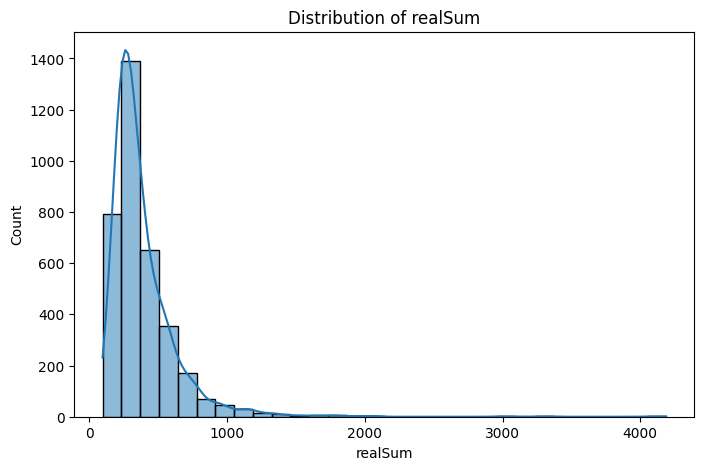

In [51]:
# Phân phối target (realSum)
plt.figure(figsize=(8,5))
sns.histplot(df['realSum'], bins=30, kde=True)
plt.title("Distribution of realSum")
plt.show()

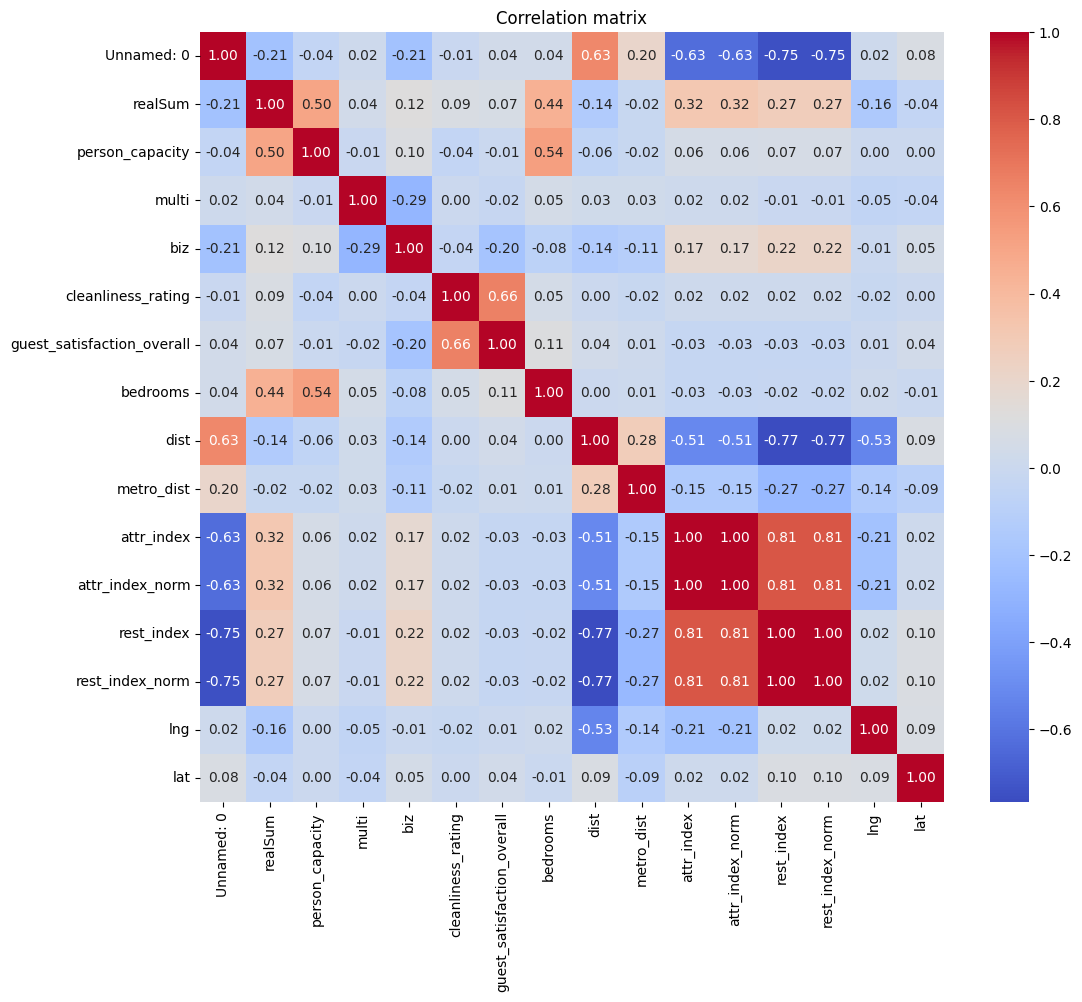

In [52]:
# Biểu đồ correlation numeric features
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12,10))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

In [53]:
# Giả sử df là dataframe của bạn
df['room_type'] = df['room_type'].map({
    'Entire home/apt': 0,
    'Private room': 1,
    'Shared room': 2
})

# Chuyển boolean sang numeric (0/1)
bool_cols = ['room_shared', 'room_private', 'host_is_superhost']
df[bool_cols] = df[bool_cols].astype(int)

print(df.head(5))

   Unnamed: 0     realSum  room_type  room_shared  room_private  \
0           0  536.396682          0            0             0   
1           1  290.101594          1            0             1   
2           2  445.754497          0            0             0   
3           3  211.343089          1            0             1   
4           4  266.334234          0            0             0   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0              5.0                  0      0    1                 9.0   
1              2.0                  1      0    0                10.0   
2              4.0                  0      0    1                10.0   
3              2.0                  0      0    0                10.0   
4              2.0                  1      0    0                 9.0   

   guest_satisfaction_overall  bedrooms      dist  metro_dist   attr_index  \
0                        89.0         1  1.351201    0.212346   390.776775   
1 